In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Use of the `Detection` class

In [ ]:
from hs2 import Detection
from Probe import BioCam

In [3]:
# raw data location
data_path = '/disk/scratch/mhennig/P29_16_07_14/raw/P29_16_05_14_retina02_left_stim3_fullarray_fullfieldHDF5.brw'

# detection parameters
to_localize = True
cutout_start = 10
cutout_end = 30
threshold = 20
file_name = 'ProcessedSpikes_biocam.bin'

In [6]:
Probe = BioCam(data_path)
H = Detection(Probe, to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0, out_file_name=file_name)

3Brain data format: 100


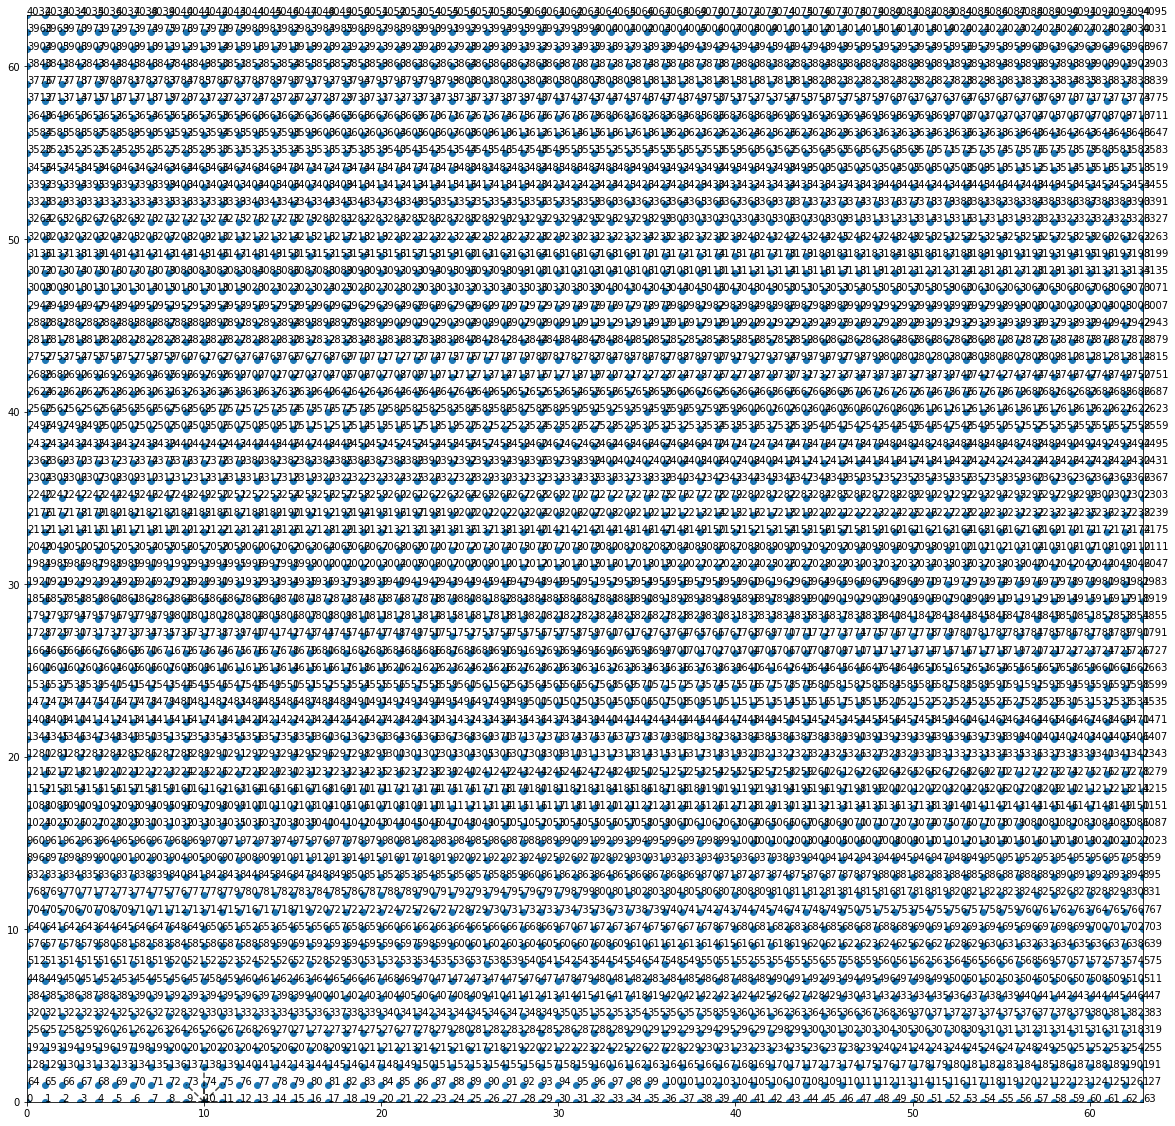

In [7]:
Probe.show(figwidth=20)

In [9]:
H.DetectFromRaw()

# Sampling rate: 7022
# Localization On
# Masking Channels: [0]
# Number of recorded channels: 4096
# Analysing frames: 912032, Seconds:129.881008418
# Frames before spike in cutout: 7
# Frames after spike in cutout: 15
# tcuts: 22 42
# tInc: 100000
# Analysing 100000 frames; -22 100042
# Analysing 100000 frames; 99978 200042
# Analysing 100000 frames; 199978 300042
# Analysing 100000 frames; 299978 400042
# Analysing 100000 frames; 399978 500042
# Analysing 100000 frames; 499978 600042
# Analysing 100000 frames; 599978 700042
# Analysing 100000 frames; 699978 800042
# Analysing 100000 frames; 799978 900042
# Analysing 11990 frames; 899978 912032
# Time taken for detection: 0:01:30.805120
# Time per frame: 0:00:00.099564
# Time per sample: 0:00:00.000024


In [11]:
H.LoadDetected()

Detected and read 467459 spikes.


Spike detected at channel:  1069
Spike detected at frame:  193


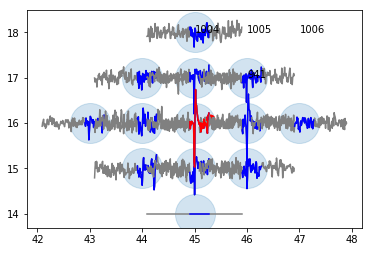

In [12]:
H.PlotTracesChannels(52)

We have 467459 spikes, only showing 200000


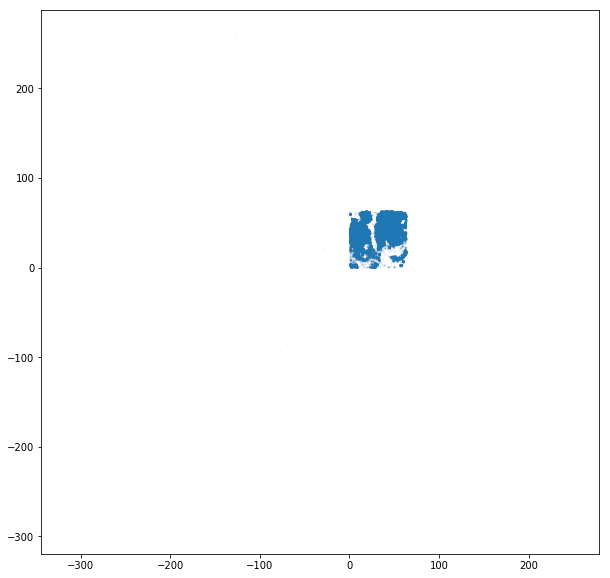

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
H.PlotAll(invert=True, s=1, alpha=0.05)
plt.axis('equal');

# Use of the `Clustering` class

In [44]:
from hs2 import Clustering
from sklearn.cluster import DBSCAN

In [59]:
#C = Clustering(['ProcessedSpikes_biocam.bin'], cutout_length=41)
C = Clustering(H)

In [60]:
C.ShapePCA(pca_ncomponents=2, pca_whiten=True)

C.CombinedClustering(alpha=0.4, bandwidth=0.3, bin_seeding=True,
                     min_bin_freq=10, n_jobs=-1)

Fitting PCA using 467459 spikes...
Clustering...
total number of seeds: 8871
seeds/job: 740
using 12 cpus


[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:  1.1min remaining:  3.4min
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:  1.2min remaining:   14.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.2min finished


Number of estimated clusters: 1078


In [61]:
plt.figure(figsize=(10, 10))
C.PlotAll(invert=True, s=1)
# plt.xlim((1350,1600))
plt.title("MeanShift, bandwidth=.3, min_bin_freq=10")

AttributeError: 'Clustering' object has no attribute 'PlotAll'

In [62]:
C.CombinedClustering(eps=0.2, alpha=0.4, clustering_algorithm=DBSCAN,
                    min_samples=5, n_jobs=-1)

Clustering...
Number of estimated clusters: 2066


/disk/scratch/miniconda/envs/my_default/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/disk/scratch/miniconda/envs/my_default/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [ ]:
plt.figure(figsize=(12, 12))
H.PlotAll(invert=True, s=1)
plt.title("DBSCAN eps=0.2, min_samples=5")
# plt.xlim((1350,1600))

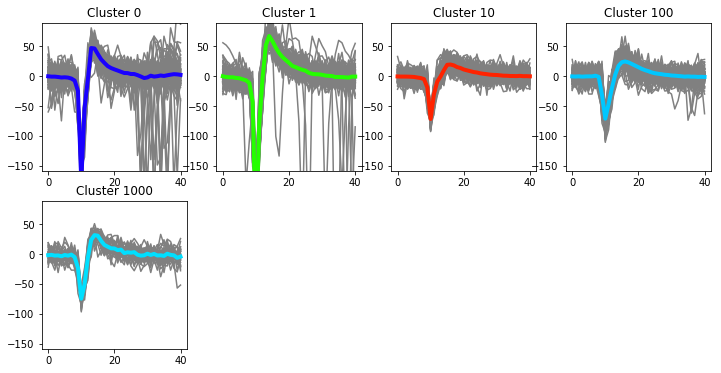

In [64]:
units = (0, 1, 10, 100, 1000)

C.PlotShapes(units)

TODO:
- PlotAll for clustered
- Save in different hdf5 files
- Save the entire class
